In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [ ]:
n = 100
true_k = 2.5
true_b = -1.0
x = np.random.rand(n) * 10
noise = np.random.randn(n)
y = true_k * x + true_b + noise

In [ ]:
x_mean = np.mean(x)
y_mean = np.mean(y)
k_hat = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
b_hat = y_mean - k_hat * x_mean

# Порівняння з numpy.polyfit
k_poly, b_poly = np.polyfit(x, y, 1)

print(f"Аналітичний розв'язок (МНК): k = {k_hat:.3f}, b = {b_hat:.3f}")
print(f"numpy.polyfit:               k = {k_poly:.3f}, b = {b_poly:.3f}")
print(f"Справжні параметри:         k = {true_k},   b = {true_b}")

Аналітичний розв'язок (МНК): k = 2.494, b = -0.778
numpy.polyfit:               k = 2.494, b = -0.778
Справжні параметри:         k = 2.5,   b = -1.0


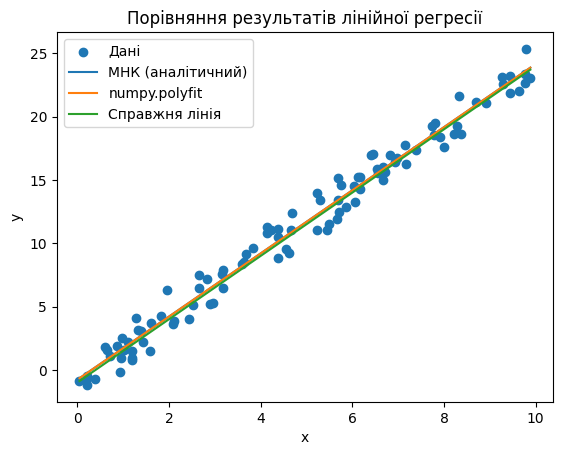

In [ ]:
plt.figure()
plt.scatter(x, y, label='Дані')
x_line = np.array([x.min(), x.max()])
plt.plot(x_line, k_hat * x_line + b_hat, label='МНК (аналітичний)')
plt.plot(x_line, k_poly * x_line + b_poly, label='numpy.polyfit')
plt.plot(x_line, true_k * x_line + true_b, label='Справжня лінія')
plt.title("Порівняння результатів лінійної регресії")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
def gradient_descent(x, y, lr, n_iter):
    k, b = 0.0, 0.0
    n = len(x)
    errors = []
    for i in range(n_iter):
        y_pred = k * x + b
        error = y_pred - y
        mse = np.mean(error**2)
        errors.append(mse)
        # Градієнти
        grad_k = (2/n) * np.sum(x * error)
        grad_b = (2/n) * np.sum(error)
        # Оновлення параметрів
        k -= lr * grad_k
        b -= lr * grad_b
    return k, b, errors

Градієнтний спуск: k = 2.389, b = -0.108


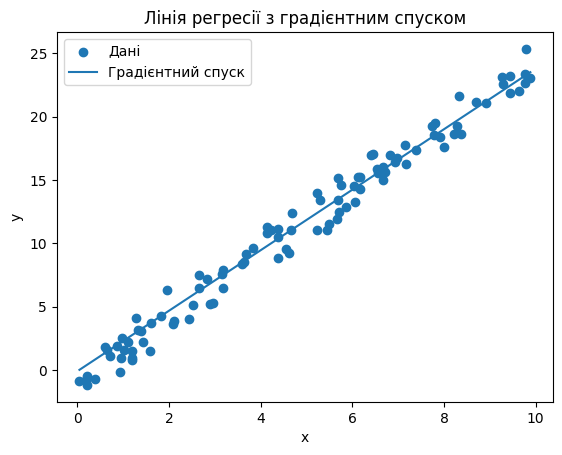

In [ ]:
learning_rate = 0.001
n_iterations = 1000
k_gd, b_gd, mse_history = gradient_descent(x, y, learning_rate, n_iterations)

print(f"Градієнтний спуск: k = {k_gd:.3f}, b = {b_gd:.3f}")

plt.figure()
plt.scatter(x, y, label='Дані')
plt.plot(x_line, k_gd * x_line + b_gd, label='Градієнтний спуск')
plt.title("Лінія регресії з градієнтним спуском")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

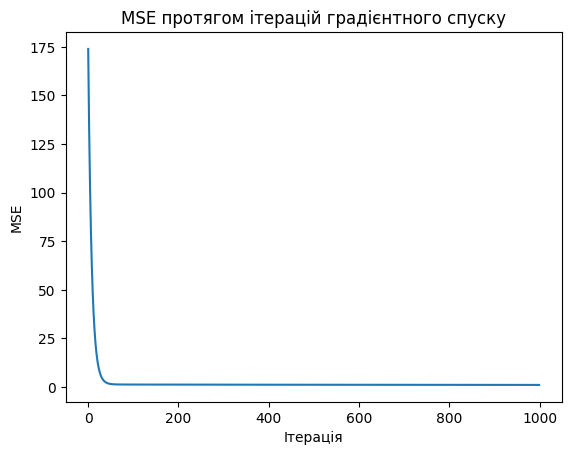

In [ ]:
plt.figure()
plt.plot(range(n_iterations), mse_history)
plt.title("MSE протягом ітерацій градієнтного спуску")
plt.xlabel("Ітерація")
plt.ylabel("MSE")
plt.show()